# Proyecto Módulo 3 
### Cálculo de volumenes para sólidos de revolución mediante integración montecarlo
## Simulación Matemática
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://i2.wp.com/lasmatematicas.eu/wp-content/uploads/2017/09/solidos-revolucion.jpg?fit=918%2C657" width="450px" height="150px" />
Integrantes:

<li>- Ernesto Díaz </li>
<li>- Manuel Sánchez </li>

Profesor:
 Lázaro Alonso
 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def raiz(x):
    return np.sqrt(x)

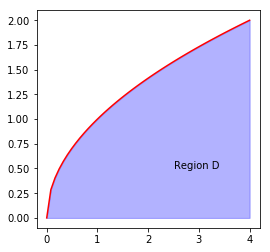

In [3]:
x = np.linspace(0,4)
y = raiz(x)
plt.figure(figsize = (4,4))
plt.fill_between(x,y, alpha = .3, color = "b")
plt.text(2.5,0.5, "Region D")
plt.plot(x, y, 'r-')
plt.show()

In [4]:
import sympy as sym
from sympy import init_printing
init_printing()

In [5]:
x = sym.var("x")

In [6]:
expresion = np.pi * sym.integrate((sym.sqrt(x))**2, (x, 0, 4))

In [7]:
expresion.evalf()

$$ \int_{a}^{b} f(x) dx \approx \frac{b - a}{n}\sum_{i = 1}^{n} f(u_{i}(b-a) + a) $$

## Aplicando montecarlo para volumen

$$ v = \pi\int_{a}^{b} (f(x))^2 dx \approx \frac{\pi(b - a)}{n}\sum_{i = 1}^{n} (f(u_{i}(b-a) + a))^2 $$ 

In [8]:
def int_montecarlo_vol(f, a, b, n):
    """Esta función calcula la integral 
    por montecarlo, dado el integrando,
    el intervalo de integración y el
    número de muestras aleatorias"""
    u_i = np.random.rand(n)
    arg_f = u_i*(b - a) + a
    return np.pi*(b-a)/n * np.sum((f(arg_f))**2)

In [9]:
int_montecarlo_vol(raiz, 0, 4, 100000)

In [10]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
#from matplotlib.patches import Circle, PathPatch
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib import cm

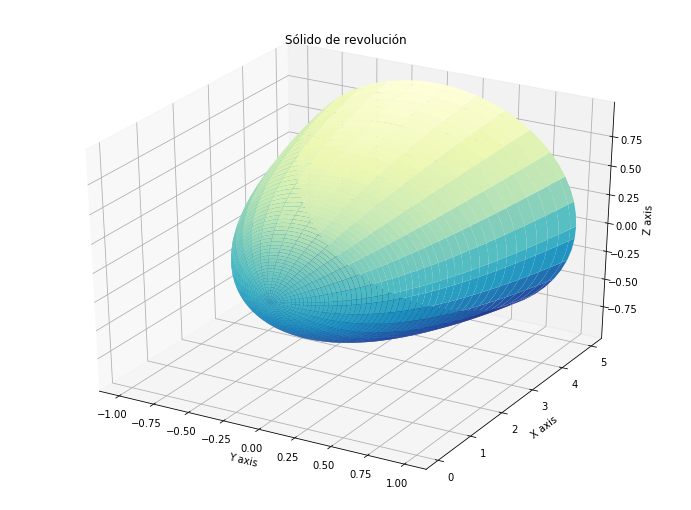

In [11]:
np.seterr(divide='ignore', invalid='ignore')

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')

ll, ul = 0, 1 
u = np.linspace(ll, ul, 100)
v = np.linspace(0, 2*np.pi, 60)
U, V = np.meshgrid(u, v)

Y = U**5 + U**4 + U**3 + U**2 + U
X = U*np.cos(V)
Z = U*np.sin(V)

ax.set_xlabel('Y axis')
ax.set_ylabel('X axis')
ax.set_zlabel('Z axis')
plt.title("Sólido de revolución")

ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)

plt.show()